In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA



%matplotlib inline

pd.set_option('display.max_columns', None)  # This will display all columns


In [404]:
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

# Airbnb Listings Data in Seattle

The following datasets focus on Airbnb listings data in Seattle:

1. **`dfc`**: Calendars Data
   - Lists each listing's daily availability and price between January 2016 and January 2017.


2. **`dfl`**: Detailed Listing Information
   - Includes data on prices, fees, location, amenities, and reviews for each listing.


3. **`dfr`**: Reviews Data
   - Contains detailed information about the reviews given to the listings, including ratings and text reviews.


# Target Research Questions

The following are the three target research questions:

1. What months witnessed the peak of the average listing nightly price in Seattle?
2. What are the top 3 listing neighbourhood groups in terms of average nightly price in Seattle?
3. What factors are most correlated with predicting the listing nightly price?


# Analysis Plan

- To answer Q1, we'll use the `dfc` dataset.
- To answer Q2 and Q3, we'll use the `dfl` dataset.
- The `dfr` dataset will not be necessary for this analysis, as we have ratings score data per listing in `dfl`; therefore, it will not be needed.


# Step 1: Data Assessment

## 1. dfc

In [405]:
print(dfc.head())
print(dfc.shape)

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
(1393570, 4)


In [406]:
#checking for data types
dfc.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [407]:
dfc.describe()

listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07

In [408]:
#checking for nulls
dfc.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [409]:
#comparing to see if the nulls in price is only when it's not available
dfc[dfc['available']=='f'].isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [410]:
#checking for duplicates
dfc.duplicated().sum()

0

### dfc Quality Assessment

- The `dfc` dataset is very clean; however, the data types need to be fixed.
- The null values in the price column are logical, as they indicate that the listing is not available for booking on the given day.
- During data wrangling, these rows will be removed.
- No duplicate rows found.


## 2. dfl

In [482]:
print(dfl.columns)
print(dfl.shape)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [412]:
#checking for data types
dfl.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [413]:
dfl.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms         beds  square_feet  guests_included  \
count  3802.000000  3812.000000  3817.000000    97.000000      3818.000000   
mean      1.259469     1.307712     1.735394   854.618557         1.672603   
std       0.590369     0.883395     1.139480   671.404893         1.311040   
min       0.000000     0.000000     1.000000     0.000000         0.000000   
25%       1.000000     1.000000     1.000000   420.000000         1.000000   
50%       1.000000     1.000000     1.000000   750.000000         1.000000   
75%       1.000000     2.000000     2.000000  1200.000000         2.000000   
max       8.000000     7.000000    15.000000  3000.000000        15.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count     3818.000000     3818.000000      3818.000000      3818.000000   
mean         2.369303      780.447617        16.786276        36.814825   
std         16.305902     1683.589007        12.173637        23.337541   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000       60.000000         2.000000        13.000000   
50%          2.000000     1125.000000        20.000000        46.000000   
75%          2.000000     1125.000000        30.000000        59.000000   
max       1000.000000   100000.000000        30.000000        60.000000   

       availability_90  availability_365  number_of_reviews  \
count      3818.000000       3818.000000        3818.000000   
mean         58.082504        244.772656          22.223415   
std          34.063845        126.772526          37.730892   
min           0.000000          0.000000           0.000000   
25%          28.000000        124.000000           2.000000   
50%          73.000000        308.000000           9.000000   
75%          89.000000        360.000000          26.000000   
max          90.000000        365.000000         474.000000   

       review_scores_rating  review_scores_accuracy  \
count           3171.000000             3160.000000   
mean              94.539262                9.636392   
std                6.606083                0.698031   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               96.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                3165.000000            3160.000000   
mean                    9.556398               9.786709   
std                     0.797274               0.595499   
min 

In [415]:
#checking for nulls
dfl.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [416]:
#creating a separate df to view columns with nulls
na_summary = dfl.isna().sum().reset_index()
na_summary.columns = ['Column', 'Missing Values']
na_summary = na_summary[na_summary['Missing Values'] != 0]
na_summary

Column  Missing Values
5                       summary             177
6                         space             569
9         neighborhood_overview            1032
10                        notes            1606
11                      transit             934
12                thumbnail_url             320
13                   medium_url             320
15               xl_picture_url             320
18                    host_name               2
19                   host_since               2
20                host_location               8
21                   host_about             859
22           host_response_time             523
23           host_response_rate             523
24         host_acceptance_rate             773
25            host_is_superhost               2
26           host_thumbnail_url               2
27             host_picture_url               2
28           host_neighbourhood             300
29          host_listings_count               2
30    host_total_listings_count               2
31           host_verifications               2
32         host_has_profile_pic               2
33       host_identity_verified               2
35                neighbourhood             416
40                      zipcode               7
48                property_type               1
51                    bathrooms              16
52                     bedrooms               6
53                         beds               1
56                  square_feet            3721
58                 weekly_price            1809
59                monthly_price            2301
60             security_deposit            1952
61                 cleaning_fee            1030
74                 first_review             627
75                  last_review             627
76         review_scores_rating             647
77       review_scores_accuracy             658
78    review_scores_cleanliness             653
79        review_scores_checkin             658
80  review_scores_communication             651
81       review_scores_location             655
82          review_scores_value             656
84                      license            3818
91            reviews_per_month             627

In [417]:
#creating a separate df to view columns dtypes
pd.set_option('display.max_rows', None)

dtype_summary = dfl.dtypes.reset_index()
dtype_summary.columns = ['Column', 'dtype']
dtype_summary

Column    dtype
0                                 id    int64
1                        listing_url   object
2                          scrape_id    int64
3                       last_scraped   object
4                               name   object
5                            summary   object
6                              space   object
7                        description   object
8                experiences_offered   object
9              neighborhood_overview   object
10                             notes   object
11                           transit   object
12                     thumbnail_url   object
13                        medium_url   object
14                       picture_url   object
15                    xl_picture_url   object
16                           host_id    int64
17                          host_url   object
18                         host_name   object
19                        host_since   object
20                     host_location   object
21                        host_about   object
22                host_response_time   object
23                host_response_rate   object
24              host_acceptance_rate   object
25                 host_is_superhost   object
26                host_thumbnail_url   object
27                  host_picture_url   object
28                host_neighbourhood   object
29               host_listings_count  float64
30         host_total_listings_count  float64
31                host_verifications   object
32              host_has_profile_pic   object
33            host_identity_verified   object
34                            street   object
35                     neighbourhood   object
36            neighbourhood_cleansed   object
37      neighbourhood_group_cleansed   object
38                              city   object
39                             state   object
40                           zipcode   object
41                            market   object
42                    smart_location   object
43                      country_code   object
44                           country   object
45                          latitude  float64
46                         longitude  float64
47                 is_location_exact   object
48                     property_type   object
49                         room_type   object
50                      accommodates    int64
51                         bathrooms  float64
52                          bedrooms  float64
53                              beds  float64
54                          bed_type   object
55                         amenities   object
56                       square_feet  float64
57                             price   object
58                      weekly_price   object
59                     monthly_price   object
60                  security_deposit   object
61                      cleaning_fee   object
62                   guests_included    int64
63                      extra_people   object
64                    minimum_nights    int64
65                    maximum_nights    int64
66                  calendar_updated   object
67                  has_availability   object
68                   availability_30    int64
69                   availability_60    int64
70                   availability_90    int64
71                  availability_365    int64
72             calendar_last_scraped   object
73                 number_of_reviews    int64
74                      first_review   object
75                       last_review   object
76              review_scores_rating  float64
77            review_scores_accuracy  float64
78         review_scores_cleanliness  float64
79             review_scores_checkin  float64
80       review_scores_communication  float64
81            review_scores_location  float64
82               review_scores_value  float64
83                  requires_license   object
84                           license  float64
85                jurisdiction_names   object
86                  instant_

In [418]:
dfl.duplicated().sum()

0

### dfl Quality Assessment

- The `dfl` dataset has 92 columns, a lot of the columns are duplicates of eachother, and many of them will not provide value to the analysis, therefore they'll be dropped.
- dtypes will need some augmenting, especially for numerical features that are being stores as objects, and some times as floats instead of integers.
- No duplicates.
- Null values are present in a lot of columns, they'll be dealt with after dropping the unnecessary features first.


# Step 2: Data Cleaning & Wrangling

## 1. dfc

In [419]:
dfc.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [420]:
# formatting price as number and removing any syntax
dfc['price'] = dfc['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
#confirming the dtype change
dfc.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [421]:
# Switching the date column to datetime
dfc['date'] = pd.to_datetime(dfc['date'])

#confirming the dtype change
dfc.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [422]:
# To use dfc in answering Q1, we'll need to regroup the df to focus only on the timeseries data rather than the listing data.
# First, we filter for data rows where it was available, and therefore had a price point.
available = dfc[dfc['available']=='t']

In [423]:
# Create a new column that extracts the month and year from the 'date' column
available['month_year'] = available['date'].dt.to_period('M').dt.to_timestamp()
available.head()

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1314209813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available['month_year'] = available['date'].dt.to_period('M').dt.to_timestamp()


listing_id       date available  price month_year
0       241032 2016-01-04         t   85.0 2016-01-01
1       241032 2016-01-05         t   85.0 2016-01-01
9       241032 2016-01-13         t   85.0 2016-01-01
10      241032 2016-01-14         t   85.0 2016-01-01
14      241032 2016-01-18         t   85.0 2016-01-01

In [424]:
# Grouping by 'month_year' and calculating both mean and median for 'price'
grouped = available.groupby('month_year')['price'].agg(['mean', 'median']).round(2).reset_index()

# Rename the columns for clarity
grouped.columns = ['month_year', 'mean_price', 'median_price']

grouped.head()


month_year  mean_price  median_price
0 2016-01-01      121.57          99.0
1 2016-02-01      124.29         100.0
2 2016-03-01      128.64         100.0
3 2016-04-01      135.10         110.0
4 2016-05-01      139.54         110.0

## 2. dfl

In [425]:
dtype_summary

Column    dtype
0                                 id    int64
1                        listing_url   object
2                          scrape_id    int64
3                       last_scraped   object
4                               name   object
5                            summary   object
6                              space   object
7                        description   object
8                experiences_offered   object
9              neighborhood_overview   object
10                             notes   object
11                           transit   object
12                     thumbnail_url   object
13                        medium_url   object
14                       picture_url   object
15                    xl_picture_url   object
16                           host_id    int64
17                          host_url   object
18                         host_name   object
19                        host_since   object
20                     host_location   object
21                        host_about   object
22                host_response_time   object
23                host_response_rate   object
24              host_acceptance_rate   object
25                 host_is_superhost   object
26                host_thumbnail_url   object
27                  host_picture_url   object
28                host_neighbourhood   object
29               host_listings_count  float64
30         host_total_listings_count  float64
31                host_verifications   object
32              host_has_profile_pic   object
33            host_identity_verified   object
34                            street   object
35                     neighbourhood   object
36            neighbourhood_cleansed   object
37      neighbourhood_group_cleansed   object
38                              city   object
39                             state   object
40                           zipcode   object
41                            market   object
42                    smart_location   object
43                      country_code   object
44                           country   object
45                          latitude  float64
46                         longitude  float64
47                 is_location_exact   object
48                     property_type   object
49                         room_type   object
50                      accommodates    int64
51                         bathrooms  float64
52                          bedrooms  float64
53                              beds  float64
54                          bed_type   object
55                         amenities   object
56                       square_feet  float64
57                             price   object
58                      weekly_price   object
59                     monthly_price   object
60                  security_deposit   object
61                      cleaning_fee   object
62                   guests_included    int64
63                      extra_people   object
64                    minimum_nights    int64
65                    maximum_nights    int64
66                  calendar_updated   object
67                  has_availability   object
68                   availability_30    int64
69                   availability_60    int64
70                   availability_90    int64
71                  availability_365    int64
72             calendar_last_scraped   object
73                 number_of_reviews    int64
74                      first_review   object
75                       last_review   object
76              review_scores_rating  float64
77            review_scores_accuracy  float64
78         review_scores_cleanliness  float64
79             review_scores_checkin  float64
80       review_scores_communication  float64
81            review_scores_location  float64
82               review_scores_value  float64
83                  requires_license   object
84                           license  float64
85                jurisdiction_names   object
86                  instant_

In [426]:
# Issue 1: Too many features. Analyzed the columns and decided on the set of columns that are necessary for the anaylsis.
# and these will be stored in a new df called ndfl.

ndfl = dfl[['id','experiences_offered','host_is_superhost','neighbourhood_cleansed',
       'neighbourhood_group_cleansed','zipcode','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price','number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
ndfl.sample(10)

id experiences_offered host_is_superhost neighbourhood_cleansed  \
428   7325455                none                 f            Wallingford   
903   7698916                none                 f                  Minor   
3774   119103                none                 t                Fremont   
2506  7500000                none                 f              Riverview   
2324  8196883                none                 f            Seward Park   
1820  7278583                none                 f          North Admiral   
2210  6249164                none                 t          Rainier Beach   
2504  7110923                none                 f                Ravenna   
211   8723086                none                 f        East Queen Anne   
798   8156860                none                 f    University District   

     neighbourhood_group_cleansed zipcode property_type        room_type  \
428           Other neighborhoods   98105      Bungalow  Entire home/apt   
903                  Central Area   98122     Apartment     Private room   
3774          Other neighborhoods   98103         Cabin     Private room   
2506                     Delridge   98106         House  Entire home/apt   
2324                  Seward Park   98118         House  Entire home/apt   
1820                 West Seattle   98116         House  Entire home/apt   
2210               Rainier Valley   98118         House     Private room   
2504          Other neighborhoods   98115         House  Entire home/apt   
211                    Queen Anne   98109     Apartment  Entire home/apt   
798           University District   98105         House      Shared room   

      accommodates  bathrooms  bedrooms  beds  bed_type  \
428              2        1.0       0.0   1.0  Real Bed   
903              2        1.0       1.0   1.0  Real Bed   
3774             3        1.0       1.0   2.0  Real Bed   
2506             4        1.5       2.0   2.0  Real Bed   
2324             6        2.5       2.0   3.0  Real Bed   
1820             7        2.5       3.0   4.0  Real Bed   
2210             1        1.0       1.0   1.0  Real Bed   
2504             6        2.0       3.0   3.0  Real Bed   
211              4        1.0       1.0   2.0  Real Bed   
798              1        1.0       1.0   1.0  Real Bed   

                                              amenities  square_feet    price  \
428   {TV,"Wireless Internet",Kitchen,"Free Parking ...          NaN   $75.00   
903   {TV,Internet,"Wireless Internet","Air Conditio...          NaN   $75.00   
3774  {"Wireless Internet",Kitchen,Heating,"Smoke De...          NaN   $79.00   
2506  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN  $120.00   
2324  {TV,"Cable TV",Internet,"Wireless Internet",Ki...          NaN  $100.00   
1820  {"Cable TV",Internet,"Wireless Internet",Kitch...          NaN  $225.00   
2210  {"Wireless Internet","Pets live on this proper...          NaN   $42.00   
2504  {TV,"Cable TV",Internet,"Wireless Internet",Ki...          NaN  $196.00   
211   {Internet,"Wireless Internet","Wheelchair Acce...          NaN   $85.00   
798   {Internet,"Wireless Internet",Kitchen,Heating,...          NaN   $42.00   

      number_of_reviews  review_scores_rating  review_scores_accuracy  \
428                   1                 100.0                    10.0   
903                  14                  99.0                    10.0   
3774                210                  98.0                    10.0   
2506                  5                 100.0                    10.0   
2324                  0                   NaN                     NaN   
1820                  2                 100.0                    10.0   
2210                 18                  99.0                    10.0   
2504                 10                  98.0                    10.0   
211                  15                  96.0                    10.0   
798                   0                   N

In [427]:
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   experiences_offered           3818 non-null   object 
 2   host_is_superhost             3816 non-null   object 
 3   neighbourhood_cleansed        3818 non-null   object 
 4   neighbourhood_group_cleansed  3818 non-null   object 
 5   zipcode                       3811 non-null   object 
 6   property_type                 3817 non-null   object 
 7   room_type                     3818 non-null   object 
 8   accommodates                  3818 non-null   int64  
 9   bathrooms                     3802 non-null   float64
 10  bedrooms                      3812 non-null   float64
 11  beds                          3817 non-null   float64
 12  bed_type                      3818 non-null   object 
 13  ame

In [428]:
# Looking into experiences offered column since visual inspection showed a lot of 'None', values.
ndfl.experiences_offered.value_counts()

experiences_offered
none    3818
Name: count, dtype: int64

In [429]:
# The entire column has the value 'None', therefore should be dropped
ndfl.drop(columns='experiences_offered', inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1883415132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='experiences_offered', inplace=True)


In [430]:
ndfl.host_is_superhost.value_counts()

host_is_superhost
f    3038
t     778
Name: count, dtype: int64

In [431]:
# Convert superhost values to boolean 0 and 1
ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})

# Verify the change
ndfl['host_is_superhost'].value_counts()

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/988465768.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/988465768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})


host_is_superhost
0.0    3038
1.0     778
Name: count, dtype: int64

In [432]:
# Removing "_cleansed" from the column name
ndfl.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 
                    'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/2697428032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.rename(columns={'neighbourhood_cleansed': 'neighbourhood',


In [433]:
ndfl.amenities.value_counts()

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                           45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                                                                                                       11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free

In [434]:
# Strip all special characters from the values in the amenities field
# Create a list with all the unique amenities found in the df
# Create a column for each amenity and if it was in the corresponding amenity column value, it becomes 1, else 0.

# Step 1: Clean and convert 'amenities' into sets
# This will split the amenities by commas properly
ndfl.loc[:, 'amenities'] = ndfl['amenities'].apply(lambda x: set(x.strip('{}').replace('"', '').split(',')))

# Step 2: Get the list of all unique amenities
all_amenities = set().union(*ndfl['amenities'])

# Step 3: Create a column for each unique amenity and set value 1 if present, otherwise 0
for amenity in all_amenities:
    ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)

# Dropping the original 'amenities' column.
ndfl.drop('amenities', axis=1, inplace=True)

# Display the updated DataFrame (for checking results)
ndfl.head()


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1779055825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1779055825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)
/var/folders/df/vskq6r6502

id  host_is_superhost    neighbourhood neighbourhood_group zipcode  \
0   241032                0.0  West Queen Anne          Queen Anne   98119   
1   953595                1.0  West Queen Anne          Queen Anne   98119   
2  3308979                0.0  West Queen Anne          Queen Anne   98119   
3  7421966                0.0  West Queen Anne          Queen Anne   98119   
4   278830                0.0  West Queen Anne          Queen Anne   98119   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   
2         House  Entire home/apt            11        4.5       5.0   7.0   
3     Apartment  Entire home/apt             3        1.0       0.0   2.0   
4         House  Entire home/apt             6        2.0       3.0   3.0   

   bed_type  square_feet    price  number_of_reviews  review_scores_rating  \
0  Real Bed          NaN   $85.00                207                  95.0   
1  Real Bed          NaN  $150.00                 43                  96.0   
2  Real Bed          NaN  $975.00                 20                  97.0   
3  Real Bed          NaN  $100.00                  0                   NaN   
4  Real Bed          NaN  $450.00                 38                  92.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                     NaN                        NaN                    NaN   
4                     9.0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                          NaN                     NaN                  NaN   
4                         10.0                     9.0                  9.0   

   amenities_  amenities_Suitable for Events  \
0           0                              0   
1           0                              0   
2           0                              0   
3           0                              0   
4           0                              0   

   amenities_Buzzer/Wireless Intercom  amenities_Smoke Detector  \
0                                   0                         0   
1                                   1                         1   
2                                   0                         1   
3                                   0                         1   
4                                   0                         1   

   amenities_Internet  amenities_First Aid Kit  amenities_Essentials  \
0                   1                        0                     0   
1                   1                        1                     1   
2                   1                        0                     1   
3                   1                        0                     1   
4                   1                        1                     1   

   amenities_Shampoo  amenities_Other pet(s)  amenities_Dog(s)  \
0                  0                       0                 0   
1                  0                       0                 0   
2                  1                       0                 1   
3                  1                       0                 0   
4                  1                       0                 0   

   amenities_Hangers  amenities_Pets live on this property  \
0                  0                                     0   
1          

In [435]:
#removing an empty column that was created during the last step
ndfl.drop(columns='amenities_', inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/3869777445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='amenities_', inplace=True)


In [436]:
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3818 non-null   int64  
 1   host_is_superhost                     3816 non-null   float64
 2   neighbourhood                         3818 non-null   object 
 3   neighbourhood_group                   3818 non-null   object 
 4   zipcode                               3811 non-null   object 
 5   property_type                         3817 non-null   object 
 6   room_type                             3818 non-null   object 
 7   accommodates                          3818 non-null   int64  
 8   bathrooms                             3802 non-null   float64
 9   bedrooms                              3812 non-null   float64
 10  beds                                  3817 non-null   float64
 11  bed_type         

In [437]:
# Remove dollar sign and commas in price column, then convert to float
ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)

# Verify the conversion
print(ndfl['price'].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1692926425.py:2: SyntaxWarning: invalid escape sequence '\$'
  ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1692926425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)


In [438]:
# reviewing Nulls in updated ndfl
print(ndfl.isna().sum().sort_values(ascending=False))
print(ndfl.shape)

square_feet                             3721
review_scores_accuracy                   658
review_scores_checkin                    658
review_scores_value                      656
review_scores_location                   655
review_scores_cleanliness                653
review_scores_communication              651
review_scores_rating                     647
bathrooms                                 16
zipcode                                    7
bedrooms                                   6
host_is_superhost                          2
beds                                       1
property_type                              1
amenities_Family/Kid Friendly              0
amenities_Elevator in Building             0
amenities_Hair Dryer                       0
amenities_Washer                           0
amenities_Breakfast                        0
amenities_Laptop Friendly Workspace        0
amenities_Cat(s)                           0
amenities_Pets Allowed                     0
amenities_

**Null analysis in ndfl**

Total Columns: 63, Total Rows: 3818
1. square_feet: 3721 Nulls - The majority of this column is Null. Should be dropped, escpecially that other columns like bedrooms, bathrooms and property type would still provide an equivalent contribution to the size of the listing.
2. bathrooms, zipcode, bedrooms, host_is_superhost, beds & property_type columns have null values between 1 and 16. Rows should be dropped.
3.  review_scores columns: Null values range between 647 and 658. Imputation using KNN transformation would be adequate in this scenario.


In [439]:
#Dropping the square_feet column
ndfl.drop(columns='square_feet',inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/1704609858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='square_feet',inplace=True)


In [440]:
ndfl.isna().sum()

id                                        0
host_is_superhost                         2
neighbourhood                             0
neighbourhood_group                       0
zipcode                                   7
property_type                             1
room_type                                 0
accommodates                              0
bathrooms                                16
bedrooms                                  6
beds                                      1
bed_type                                  0
price                                     0
number_of_reviews                         0
review_scores_rating                    647
review_scores_accuracy                  658
review_scores_cleanliness               653
review_scores_checkin                   658
review_scores_communication             651
review_scores_location                  655
review_scores_value                     656
amenities_Suitable for Events             0
amenities_Buzzer/Wireless Interc

In [441]:
#Dropping rows with Nulls in bathrooms, zipcode, bedrooms, host_is_superhost, beds & property_type columns
ndfl = ndfl.dropna(subset=['bathrooms', 'zipcode', 'bedrooms', 'host_is_superhost', 'beds', 'property_type'], axis=0)

In [442]:
# Replacing Nulls in review score columns with the mean of each column.
# Specify the review score columns
review_score_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value']

# Perform mean imputation
for x in review_score_columns:
    mean_value = ndfl[x].mean()  # Calculate mean of the column
    ndfl[x].fillna(mean_value, inplace=True)  # Fill NaN with the mean value


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_47752/4029488721.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndfl[x].fillna(mean_value, inplace=True)  # Fill NaN with the mean value


In [443]:
#switching bathrooms, bedrooms & beds dtype to integer

ndfl['bathrooms'] = ndfl['bathrooms'].astype(int)  
ndfl['bedrooms'] = ndfl['bedrooms'].astype(int)    
ndfl['beds'] = ndfl['beds'].astype(int)            
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 0 to 3817
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3786 non-null   int64  
 1   host_is_superhost                     3786 non-null   float64
 2   neighbourhood                         3786 non-null   object 
 3   neighbourhood_group                   3786 non-null   object 
 4   zipcode                               3786 non-null   object 
 5   property_type                         3786 non-null   object 
 6   room_type                             3786 non-null   object 
 7   accommodates                          3786 non-null   int64  
 8   bathrooms                             3786 non-null   int64  
 9   bedrooms                              3786 non-null   int64  
 10  beds                                  3786 non-null   int64  
 11  bed_type              

In [444]:
ndfl.head()

id  host_is_superhost    neighbourhood neighbourhood_group zipcode  \
0   241032                0.0  West Queen Anne          Queen Anne   98119   
1   953595                1.0  West Queen Anne          Queen Anne   98119   
2  3308979                0.0  West Queen Anne          Queen Anne   98119   
3  7421966                0.0  West Queen Anne          Queen Anne   98119   
4   278830                0.0  West Queen Anne          Queen Anne   98119   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4          1         1     1   
1     Apartment  Entire home/apt             4          1         1     1   
2         House  Entire home/apt            11          4         5     7   
3     Apartment  Entire home/apt             3          1         0     2   
4         House  Entire home/apt             6          2         3     3   

   bed_type  price  number_of_reviews  review_scores_rating  \
0  Real Bed   85.0                207             95.000000   
1  Real Bed  150.0                 43             96.000000   
2  Real Bed  975.0                 20             97.000000   
3  Real Bed  100.0                  0             94.551954   
4  Real Bed  450.0                 38             92.000000   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                10.00000                  10.000000              10.000000   
1                10.00000                  10.000000              10.000000   
2                10.00000                  10.000000              10.000000   
3                 9.63648                   9.557784               9.788903   
4                 9.00000                   9.000000              10.000000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    10.000000                9.000000            10.000000   
1                    10.000000               10.000000            10.000000   
2                    10.000000               10.000000            10.000000   
3                     9.811645                9.610704             9.454111   
4                    10.000000                9.000000             9.000000   

   amenities_Suitable for Events  amenities_Buzzer/Wireless Intercom  \
0                              0                                   0   
1                              0                                   1   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   

   amenities_Smoke Detector  amenities_Internet  amenities_First Aid Kit  \
0                         0                   1                        0   
1                         1                   1                        1   
2                         1                   1                        0   
3                         1                   1                        0   
4                         1                   1                        1   

   amenities_Essentials  amenities_Shampoo  amenities_Other pet(s)  \
0                     0                  0                       0   
1                     1                  0                       0   
2                     1                  1                       0   
3                     1                  1                       0   
4                     1                  1                       0   

   amenities_Dog(s)  amenities_Hangers  amenities_Pets live on this property  \
0                 0                  0                                     0   
1                 0                  0                                     0   
2                 1                  0                                     1   
3                 0                  0                                     0   
4                 0                 

# Step 3: Data Exploration & Analysis

### 1. What months witnessed the peak of the average listing nightly price in Seattle?


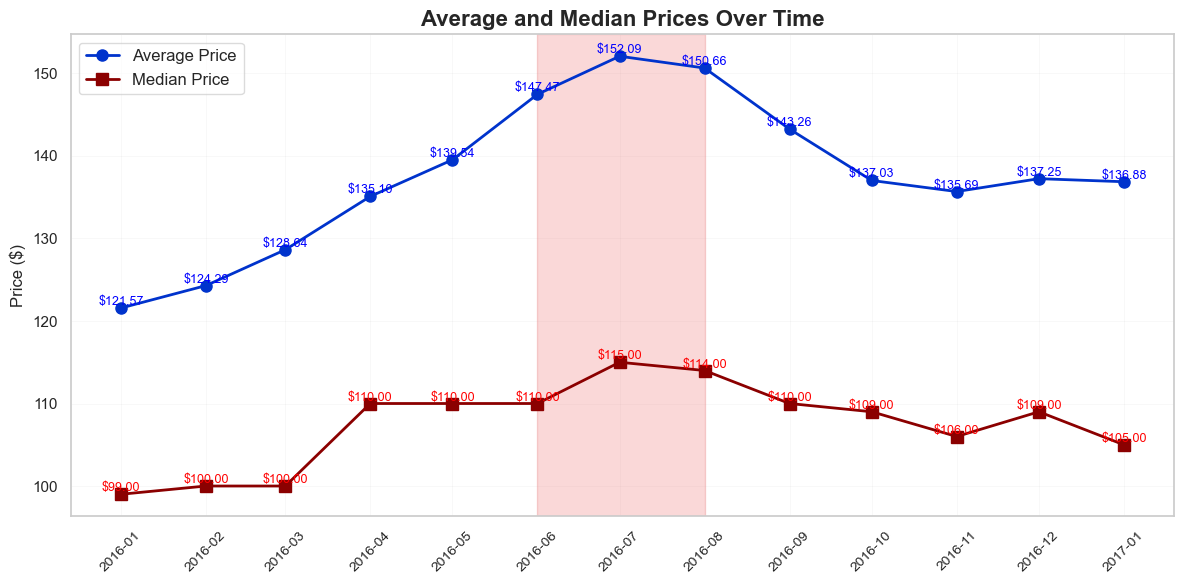

In [501]:
# Plotting both mean and median price data across time-series from dfc "grouped".

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the average price as a line with enhancements
ax.plot(grouped['month_year'], 
        grouped['mean_price'],  # Using 'mean_price' column
        color='#0033cc',  # Darker blue color
        marker='o', 
        markersize=8, 
        linewidth=2, 
        label='Average Price')

# Plotting the median price as a line with enhancements
ax.plot(grouped['month_year'], 
        grouped['median_price'],  # Using 'median_price' column
        color='#8B0000',  # Red color for the median
        marker='s', 
        markersize=8, 
        linewidth=2, 
        linestyle='-',  # Dashed line style
        label='Median Price')

# Title and labels
ax.set_title('Average and Median Prices Over Time', fontsize=16, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=12)

# Formatting the x-axis
ax.set_xticks(grouped['month_year'])  # Set x-ticks to be the month_year column
ax.set_xticklabels(grouped['month_year'].dt.strftime('%Y-%m'), rotation=45, fontsize=10)

# Adding a grid with lighter lines
ax.grid(color='gray', linestyle='-', linewidth=0.4, alpha=0.1)

# Highlight the region from June 2016 to August 2016 with pinkish color
highlight = (grouped['month_year'] >= '2016-06') & (grouped['month_year'] <= '2016-08')
ax.axvspan(grouped['month_year'][highlight].min(), 
           grouped['month_year'][highlight].max(), 
           color='lightcoral', alpha=0.3)  # Change to a pinkish color

# Adding annotations for the average price
for i in range(len(grouped)):
    ax.text(grouped['month_year'].iloc[i], 
            grouped['mean_price'].iloc[i], 
            f'${grouped["mean_price"].iloc[i]:.2f}', 
            fontsize=9, 
            ha='center', 
            va='bottom', 
            color='blue')

# Adding annotations for the median price
for i in range(len(grouped)):
    ax.text(grouped['month_year'].iloc[i], 
            grouped['median_price'].iloc[i], 
            f'${grouped["median_price"].iloc[i]:.2f}', 
            fontsize=9, 
            ha='center', 
            va='bottom', 
            color='red')

# Adding a legend with background
legend = ax.legend(loc='upper left', fontsize=12, framealpha=0.7)
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.savefig('average_and_median_Price_over_time.png', bbox_inches='tight')

plt.show()


**Key Insights**

1. The top 3 months in terms of mean nightly price are June, July and August at values ranging between 147 and 151 USD.
2. Looking at the median price, a similar trend is found.
3. This follows a seasonal tren where the high season in terms of pricing is in the months of summer.

**This brings up the question, if this trend is represented by the different neighborhoud groups equally or not**

In [446]:
#Recalling the filtered dfc "available"
available.head()

listing_id       date available  price month_year
0       241032 2016-01-04         t   85.0 2016-01-01
1       241032 2016-01-05         t   85.0 2016-01-01
9       241032 2016-01-13         t   85.0 2016-01-01
10      241032 2016-01-14         t   85.0 2016-01-01
14      241032 2016-01-18         t   85.0 2016-01-01

In [447]:
#Recalling the filtered dfl "ndfl"

ndfl.head()

id  host_is_superhost    neighbourhood neighbourhood_group zipcode  \
0   241032                0.0  West Queen Anne          Queen Anne   98119   
1   953595                1.0  West Queen Anne          Queen Anne   98119   
2  3308979                0.0  West Queen Anne          Queen Anne   98119   
3  7421966                0.0  West Queen Anne          Queen Anne   98119   
4   278830                0.0  West Queen Anne          Queen Anne   98119   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4          1         1     1   
1     Apartment  Entire home/apt             4          1         1     1   
2         House  Entire home/apt            11          4         5     7   
3     Apartment  Entire home/apt             3          1         0     2   
4         House  Entire home/apt             6          2         3     3   

   bed_type  price  number_of_reviews  review_scores_rating  \
0  Real Bed   85.0                207             95.000000   
1  Real Bed  150.0                 43             96.000000   
2  Real Bed  975.0                 20             97.000000   
3  Real Bed  100.0                  0             94.551954   
4  Real Bed  450.0                 38             92.000000   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                10.00000                  10.000000              10.000000   
1                10.00000                  10.000000              10.000000   
2                10.00000                  10.000000              10.000000   
3                 9.63648                   9.557784               9.788903   
4                 9.00000                   9.000000              10.000000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    10.000000                9.000000            10.000000   
1                    10.000000               10.000000            10.000000   
2                    10.000000               10.000000            10.000000   
3                     9.811645                9.610704             9.454111   
4                    10.000000                9.000000             9.000000   

   amenities_Suitable for Events  amenities_Buzzer/Wireless Intercom  \
0                              0                                   0   
1                              0                                   1   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   

   amenities_Smoke Detector  amenities_Internet  amenities_First Aid Kit  \
0                         0                   1                        0   
1                         1                   1                        1   
2                         1                   1                        0   
3                         1                   1                        0   
4                         1                   1                        1   

   amenities_Essentials  amenities_Shampoo  amenities_Other pet(s)  \
0                     0                  0                       0   
1                     1                  0                       0   
2                     1                  1                       0   
3                     1                  1                       0   
4                     1                  1                       0   

   amenities_Dog(s)  amenities_Hangers  amenities_Pets live on this property  \
0                 0                  0                                     0   
1                 0                  0                                     0   
2                 1                  0                                     1   
3                 0                  0                                     0   
4                 0                 

In [448]:
#Joining both tables on listing id
joined = available.merge(ndfl, how='inner', left_on='listing_id', right_on='id')

In [449]:
joined.head()

listing_id       date available  price_x month_year      id  \
0      241032 2016-01-04         t     85.0 2016-01-01  241032   
1      241032 2016-01-05         t     85.0 2016-01-01  241032   
2      241032 2016-01-13         t     85.0 2016-01-01  241032   
3      241032 2016-01-14         t     85.0 2016-01-01  241032   
4      241032 2016-01-18         t     85.0 2016-01-01  241032   

   host_is_superhost    neighbourhood neighbourhood_group zipcode  \
0                0.0  West Queen Anne          Queen Anne   98119   
1                0.0  West Queen Anne          Queen Anne   98119   
2                0.0  West Queen Anne          Queen Anne   98119   
3                0.0  West Queen Anne          Queen Anne   98119   
4                0.0  West Queen Anne          Queen Anne   98119   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4          1         1     1   
1     Apartment  Entire home/apt             4          1         1     1   
2     Apartment  Entire home/apt             4          1         1     1   
3     Apartment  Entire home/apt             4          1         1     1   
4     Apartment  Entire home/apt             4          1         1     1   

   bed_type  price_y  number_of_reviews  review_scores_rating  \
0  Real Bed     85.0                207                  95.0   
1  Real Bed     85.0                207                  95.0   
2  Real Bed     85.0                207                  95.0   
3  Real Bed     85.0                207                  95.0   
4  Real Bed     85.0                207                  95.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                    10.0                       10.0                   10.0   
4                    10.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                 10.0   
1                         10.0                     9.0                 10.0   
2                         10.0                     9.0                 10.0   
3                         10.0                     9.0                 10.0   
4                         10.0                     9.0                 10.0   

   amenities_Suitable for Events  amenities_Buzzer/Wireless Intercom  \
0                              0                                   0   
1                              0                                   0   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   

   amenities_Smoke Detector  amenities_Internet  amenities_First Aid Kit  \
0                         0                   1                        0   
1                         0                   1                        0   
2                         0                   1                        0   
3                         0                   1                        0   
4                         0                   1                        0   

   amenities_Essentials  amenities_Shampoo  amenities_Other pet(s)  \
0                     0                  0                       0   
1                     0                  0                       0   
2                     0                  0                       0   
3                     0                  0                       0   
4                     0                  0                       0   

   amenities_Dog(s)  amenities_Hangers  amenities_Pets live on this property

In [450]:
# Grouping by 'month_year' & 'neighbourhood_group' and calculating both mean and median for 'price'
grouped_cal_ng = joined.groupby(['month_year','neighbourhood_group'])['price_x'].agg(['mean', 'median']).round(2).reset_index()

# Rename the columns for clarity
grouped_cal_ng.columns = ['month_year', 'neighbourhood_group', 'mean_price', 'median_price']

print(grouped_cal_ng.head())
print(grouped_cal_ng.shape)

  month_year neighbourhood_group  mean_price  median_price
0 2016-01-01             Ballard      106.63          89.0
1 2016-01-01         Beacon Hill       97.66          75.0
2 2016-01-01        Capitol Hill      122.30         100.0
3 2016-01-01             Cascade      138.88         105.0
4 2016-01-01        Central Area      119.32          90.0
(221, 4)


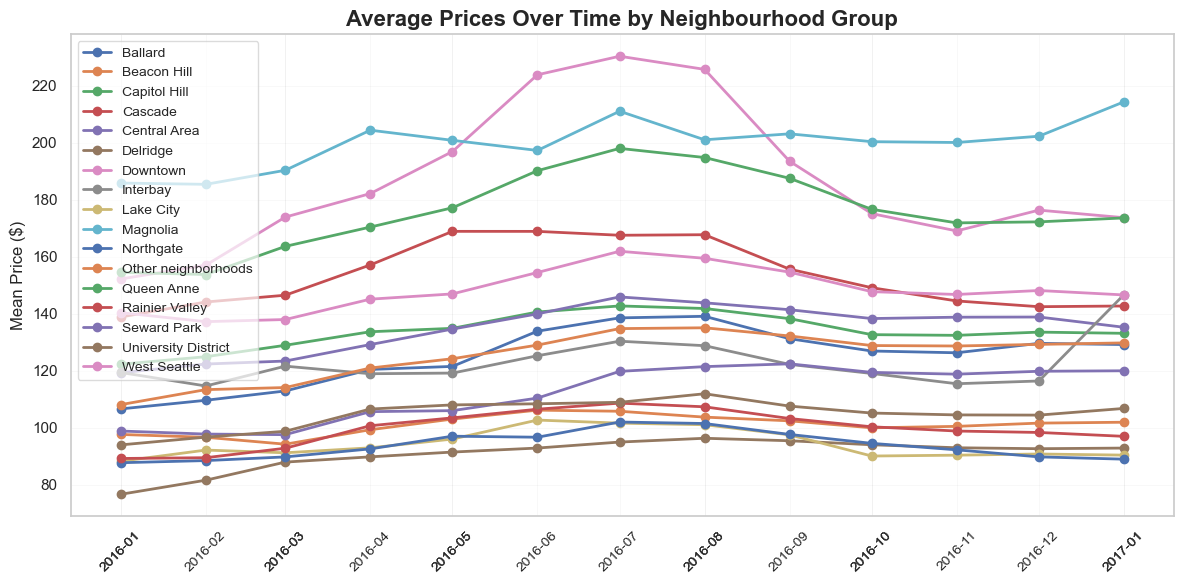

In [500]:
#Plotting the same plot as the last one, but broken down per neighbourhood this time.

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each neighbourhood group and plot its line for the mean price
for neighbourhood in grouped_cal_ng['neighbourhood_group'].unique():
    # Filter the DataFrame for the current neighbourhood
    df_neighbourhood = grouped_cal_ng[grouped_cal_ng['neighbourhood_group'] == neighbourhood]
    
    # Plotting the mean price for the neighbourhood
    ax.plot(df_neighbourhood['month_year'], 
            df_neighbourhood['mean_price'],  # Using 'mean_price' column
            marker='o', 
            markersize=6, 
            linewidth=2, 
            label=neighbourhood)  # Labeling each line with the neighbourhood name

# Title and labels
ax.set_title('Average Prices Over Time by Neighbourhood Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Mean Price ($)', fontsize=12)

# Formatting the x-axis to avoid overcrowding
# Set major ticks every few months to avoid too many labels
ax.set_xticks(grouped_cal_ng['month_year'].iloc[::12])  # Show one label every 12 months
ax.set_xticklabels(grouped_cal_ng['month_year'].iloc[::12].dt.strftime('%Y-%m'), rotation=45, fontsize=10)

# Adding a grid with lighter lines
ax.grid(color='gray', linestyle='-', linewidth=0.4, alpha=0.1)

# Adding a legend with background
legend = ax.legend(loc='upper left', fontsize=10, framealpha=0.7)
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.savefig('average_Price_over_time_per_Neighbourhood_Group.png', bbox_inches='tight')

plt.show()


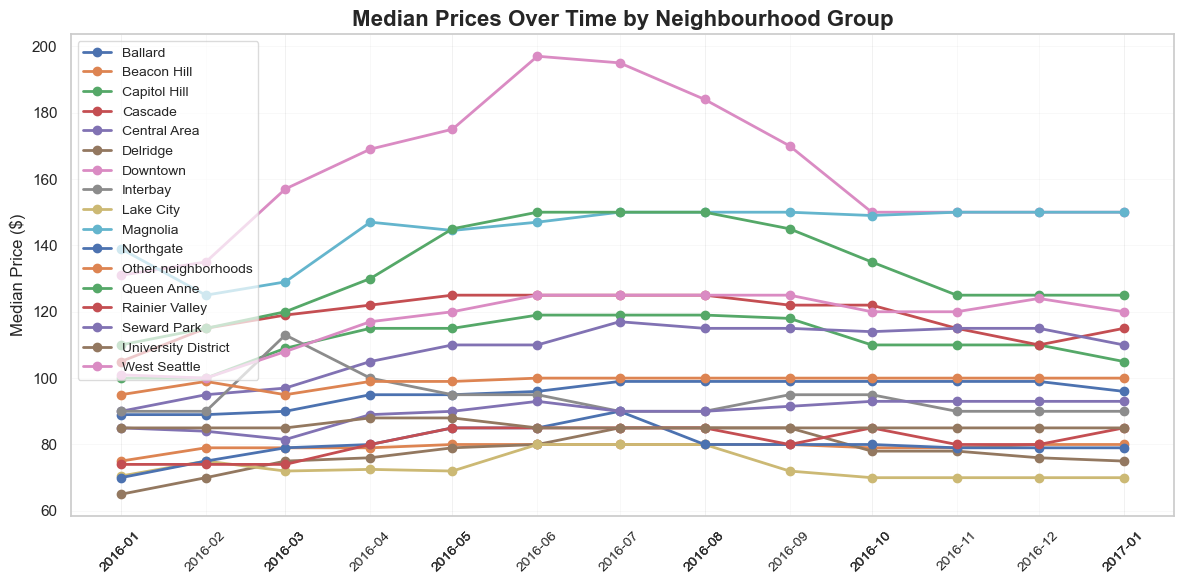

In [499]:
# Same plot with the median price

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each neighbourhood group and plot its line for the median price
for neighbourhood in grouped_cal_ng['neighbourhood_group'].unique():
    # Filter the DataFrame for the current neighbourhood
    df_neighbourhood = grouped_cal_ng[grouped_cal_ng['neighbourhood_group'] == neighbourhood]
    
    # Plotting the median price for the neighbourhood
    ax.plot(df_neighbourhood['month_year'], 
            df_neighbourhood['median_price'],  # Using 'median_price' column
            marker='o', 
            markersize=6, 
            linewidth=2, 
            label=neighbourhood)  # Labeling each line with the neighbourhood name

# Title and labels
ax.set_title('Median Prices Over Time by Neighbourhood Group', fontsize=16, fontweight='bold')
ax.set_ylabel('Median Price ($)', fontsize=12)

# Formatting the x-axis to avoid overcrowding
# Set major ticks every few months to avoid too many labels
ax.set_xticks(grouped_cal_ng['month_year'].iloc[::12])  # Show one label every 12 months
ax.set_xticklabels(grouped_cal_ng['month_year'].iloc[::12].dt.strftime('%Y-%m'), rotation=45, fontsize=10)

# Adding a grid with lighter lines
ax.grid(color='gray', linestyle='-', linewidth=0.4, alpha=0.1)

# Adding a legend with background
legend = ax.legend(loc='upper left', fontsize=10, framealpha=0.7)
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.savefig('median_Price_over_time_per_Neighbourhood_Group.png', bbox_inches='tight')

plt.show()


**Insights**
- It seems the aggregated initial trend is driven heavily by the seasonal trend taking place in listings Downtown based on both plots.

### 2. What are the top 3 listing neighbourhood groups in terms of average nightly price in Seattle?


In [453]:
# Grouping by 'neighbourhood_group' to calculate both mean price and count of listings
grouped_neighbourhoud_group = ndfl.groupby(['neighbourhood_group']).agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    count=('price', 'count')  # Count of rows for each neighbourhood group
).reset_index()

# Display the resulting DataFrame
grouped_neighbourhoud_group.head()


neighbourhood_group  mean_price  median_price  count
0             Ballard  124.244541          95.0    229
1         Beacon Hill   94.837607          75.0    117
2        Capitol Hill  130.498214         105.0    560
3             Cascade  140.101124         115.0     89
4        Central Area  128.538043         100.0    368

In [454]:
grouped_neighbourhoud_group.describe()

mean_price  median_price       count
count   17.000000     17.000000   17.000000
mean   119.929720     96.852941  222.705882
std     27.813969     20.419633  218.664630
min     83.278481     70.000000   10.000000
25%     93.639344     79.500000   76.000000
50%    119.801517     95.000000  122.000000
75%    140.101124    109.500000  294.000000
max    177.672131    139.000000  791.000000

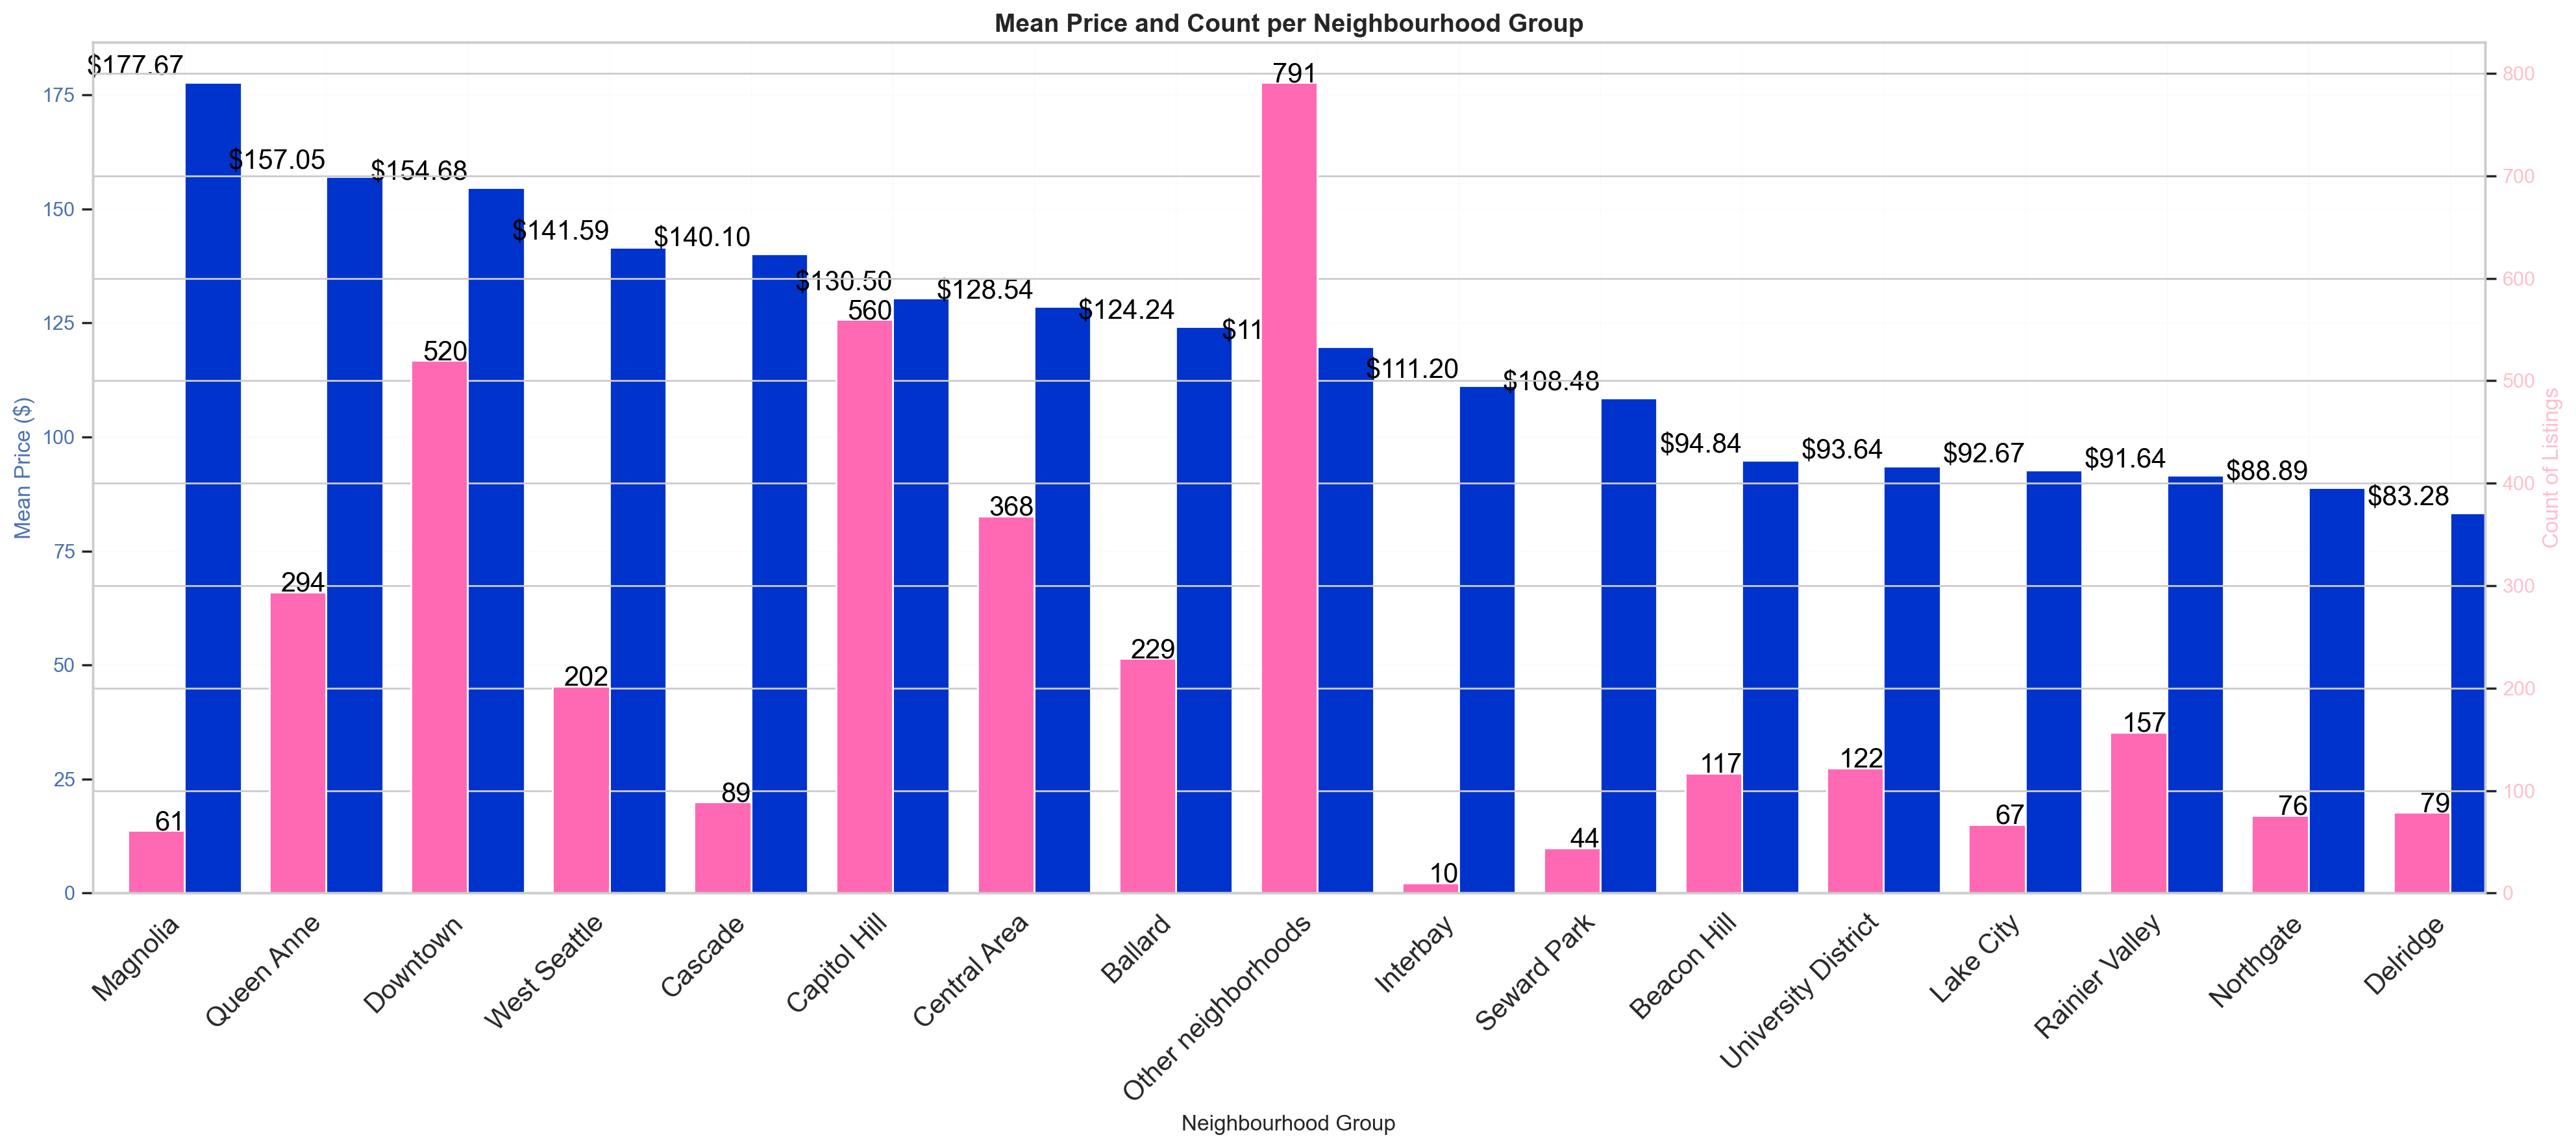

In [498]:
# Plotting mean price & count of listings vs. neighbourhood

# Sort the DataFrame by mean price in descending order
grouped_neighbourhoud_group = grouped_neighbourhoud_group.sort_values(by='mean_price', ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 9), dpi=200)  # Adjusted size for better visibility

# Plot mean price as bars
grouped_neighbourhoud_group['mean_price'].plot(kind='bar', ax=ax1, color='#0033cc', position=0, width=0.4, label='Mean Price')
ax1.set_ylabel('Mean Price ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Add gridlines
ax1.grid(True, which='major', color='gray', linestyle='-', linewidth=0.2, alpha=0.1)

# Add value labels to the mean price bars
for i, v in enumerate(grouped_neighbourhoud_group['mean_price']):
    ax1.text(i, v + 0.5, f"${v:.2f}", ha='right',va='bottom', color='black', fontsize=15)

# Create a second y-axis for the count of rows
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
grouped_neighbourhoud_group['count'].plot(kind='bar', ax=ax2, color='#FF69B4', position=1, width=0.4, label='Count of Listings')
ax2.set_ylabel('Count of Listings', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

# Add value labels to the count bars
for i, v in enumerate(grouped_neighbourhoud_group['count']):
    ax2.text(i, v + 0.5, f"{v}", ha='right', color='black', fontsize=15)

# Show title and labels
def titles(plot_title_str, x_label_str, x_ticks_column):
    plt.title(plot_title_str, fontsize=14, fontweight='bold')
    ax1.set_xlabel(x_label_str, fontsize=12)
    ax1.set_xticklabels(x_ticks_column, rotation=45, ha='right', fontsize=15)  # Improved readability

titles('Mean Price and Count per Neighbourhood Group', 'Neighbourhood Group', grouped_neighbourhoud_group['neighbourhood_group'])

# Show the plot
plt.tight_layout()
plt.savefig('mean_Price_and_Count_per_Neighbourhood_Group.png', bbox_inches='tight')

plt.show()


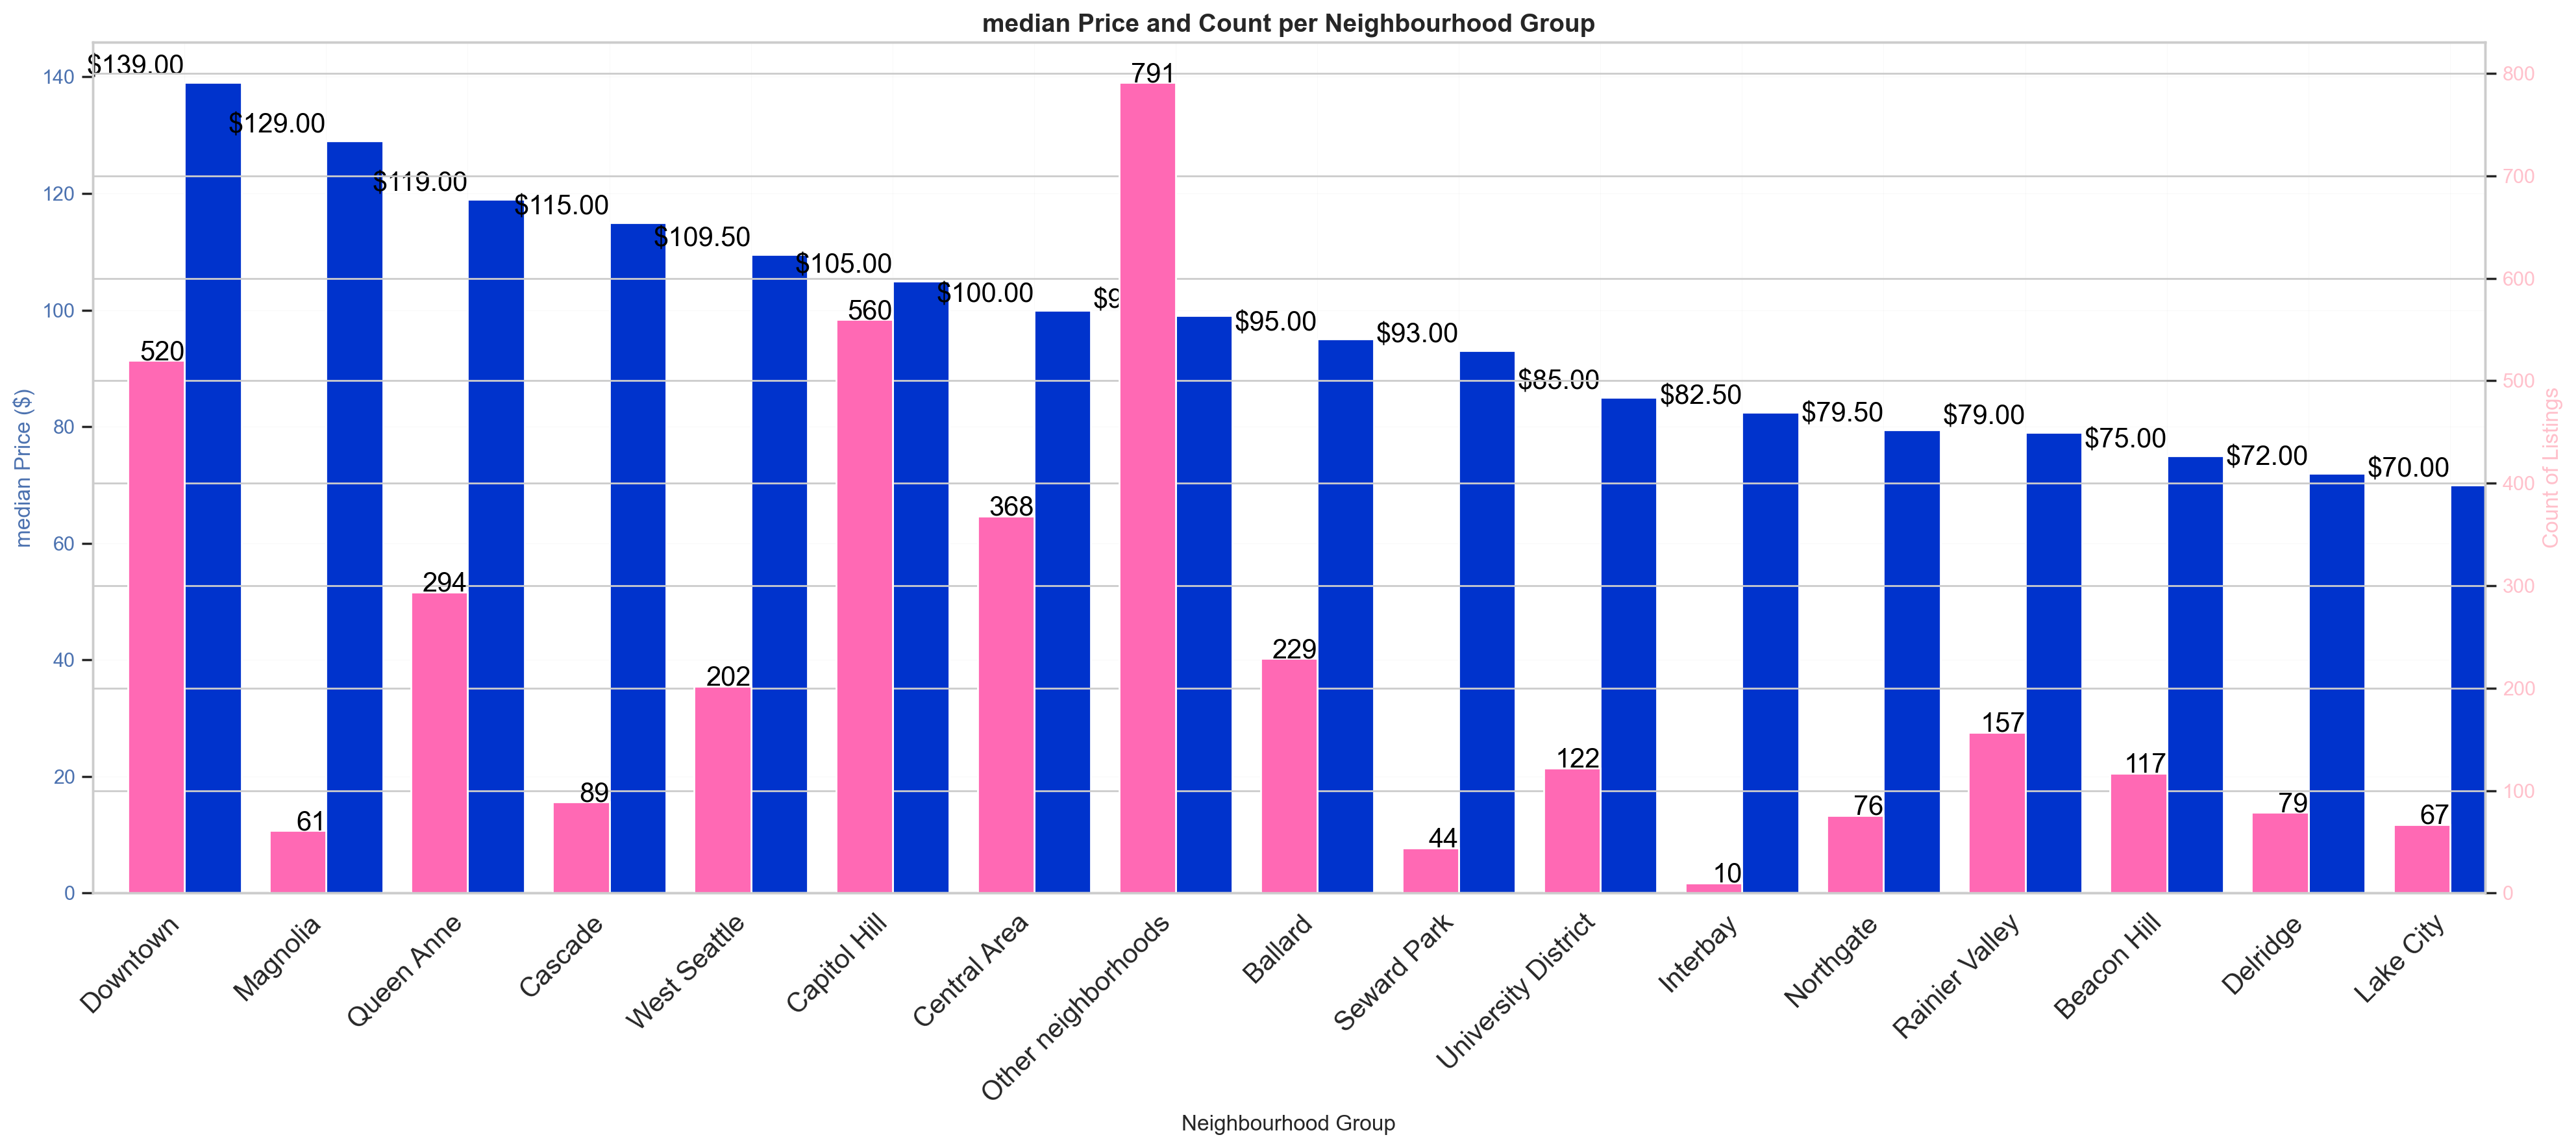

In [497]:
# Plotting median price & count of listings vs. neighbourhood

# Sort the DataFrame by median price in descending order
grouped_neighbourhoud_group = grouped_neighbourhoud_group.sort_values(by='median_price', ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 9), dpi=200)  # Adjusted size for better visibility

# Plot median price as bars
grouped_neighbourhoud_group['median_price'].plot(kind='bar', ax=ax1, color='#0033cc', position=0, width=0.4, label='median Price')
ax1.set_ylabel('median Price ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Add gridlines
ax1.grid(True, which='major', color='gray', linestyle='-', linewidth=0.2, alpha=0.1)

# Add value labels to the median price bars
for i, v in enumerate(grouped_neighbourhoud_group['median_price']):
    ax1.text(i, v + 0.5, f"${v:.2f}", ha='right',va='bottom', color='black', fontsize=15)

# Create a second y-axis for the count of rows
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
grouped_neighbourhoud_group['count'].plot(kind='bar', ax=ax2, color='#FF69B4', position=1, width=0.4, label='Count of Listings')
ax2.set_ylabel('Count of Listings', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

# Add value labels to the count bars
for i, v in enumerate(grouped_neighbourhoud_group['count']):
    ax2.text(i, v + 0.5, f"{v}", ha='right', color='black', fontsize=15)

# Show title and labels
def titles(plot_title_str, x_label_str, x_ticks_column):
    plt.title(plot_title_str, fontsize=14, fontweight='bold')
    ax1.set_xlabel(x_label_str, fontsize=12)
    ax1.set_xticklabels(x_ticks_column, rotation=45, ha='right', fontsize=15)  # Improved readability

titles('median Price and Count per Neighbourhood Group', 'Neighbourhood Group', grouped_neighbourhoud_group['neighbourhood_group'])

# Show the plot
plt.tight_layout()
plt.savefig('median_Price_and_Count_per_Neighbourhood_Group.png', bbox_inches='tight')

plt.show()


**Key Insights**

1. The top 3 listing neighbourhood groups mean nightly price are Magnolia (178 USD), Queen Anne (157 USD) & Downtown (155 USD).
2. Looking at the media price figures, the top 3 neighbourhood groups are the same although in a different order.
3. It's important to consider the variation in count of listing per neighbourhood group (only 61 in Magnolia).


### 3. What factors are most correlated with predicting the listing nightly price?

In [457]:
ndfl.columns

Index(['id', 'host_is_superhost', 'neighbourhood', 'neighbourhood_group',
       'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'amenities_Suitable for Events',
       'amenities_Buzzer/Wireless Intercom', 'amenities_Smoke Detector',
       'amenities_Internet', 'amenities_First Aid Kit', 'amenities_Essentials',
       'amenities_Shampoo', 'amenities_Other pet(s)', 'amenities_Dog(s)',
       'amenities_Hangers', 'amenities_Pets live on this property',
       'amenities_24-Hour Check-in', 'amenities_Kitchen', 'amenities_Gym',
       'amenities_Indoor Fireplace', 'amenities_Hot Tub',
       'amenities_Safety Card', 'amenities_TV', 'amenities_Cable TV',
       'amenities_Breakfast', 'amenit

In [458]:
# OneHot encoding string features
ndfl = pd.get_dummies(ndfl, columns=['neighbourhood', 'neighbourhood_group', 'zipcode', 'property_type', 'room_type', 'bed_type'], drop_first=True)


In [460]:
# Investigating correlations between features and the listing price, to minimize noise, only focusing on features-
# with corr. coeff. higher than 0.1 or less than -0.1.

correlation_matrix = ndfl.corr()

# Step 2: Get the correlations for the 'price' column
price_corr = correlation_matrix['price']
filtered_corr = price_corr[(price_corr > 0.1) | (price_corr < -0.1)]

# Step 4: Display the results
print(filtered_corr)


accommodates                            0.651968
bathrooms                               0.495875
bedrooms                                0.627772
beds                                    0.589519
price                                   1.000000
number_of_reviews                      -0.124847
amenities_Pets live on this property   -0.109938
amenities_Kitchen                       0.126091
amenities_Gym                           0.113688
amenities_Indoor Fireplace              0.145965
amenities_Hot Tub                       0.127635
amenities_TV                            0.207720
amenities_Cable TV                      0.237996
amenities_Breakfast                    -0.104074
amenities_Family/Kid Friendly           0.259789
amenities_Washer                        0.121497
amenities_Air Conditioning              0.129943
amenities_Dryer                         0.125153
amenities_Doorman                       0.118609
neighbourhood_group_Downtown            0.117975
room_type_Private ro

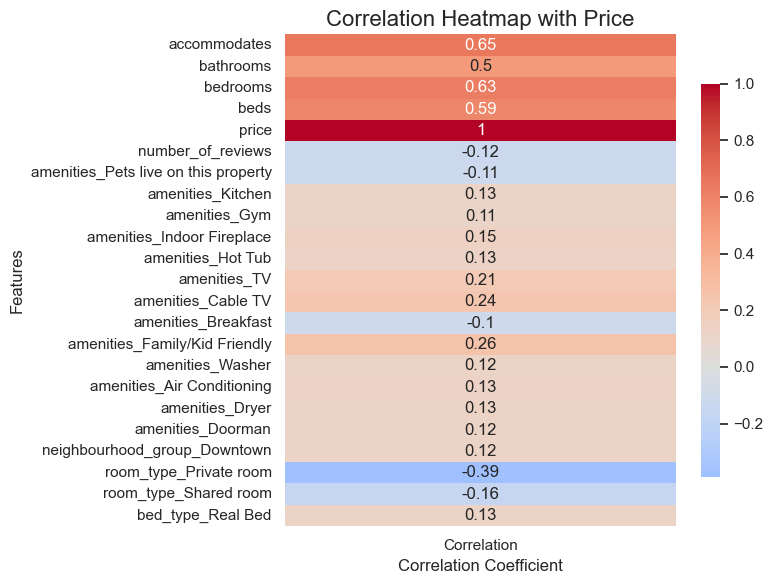

In [496]:
# Plot the correlation matrix

filtered_corr_df = filtered_corr.reset_index()
filtered_corr_df.columns = ['Feature', 'Correlation']  # Rename columns for clarity

# Step 5: Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_df.set_index('Feature'), 
            annot=True, cmap='coolwarm', center=0, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('Correlation_Heatmap_only_price.png', bbox_inches='tight')
plt.show()


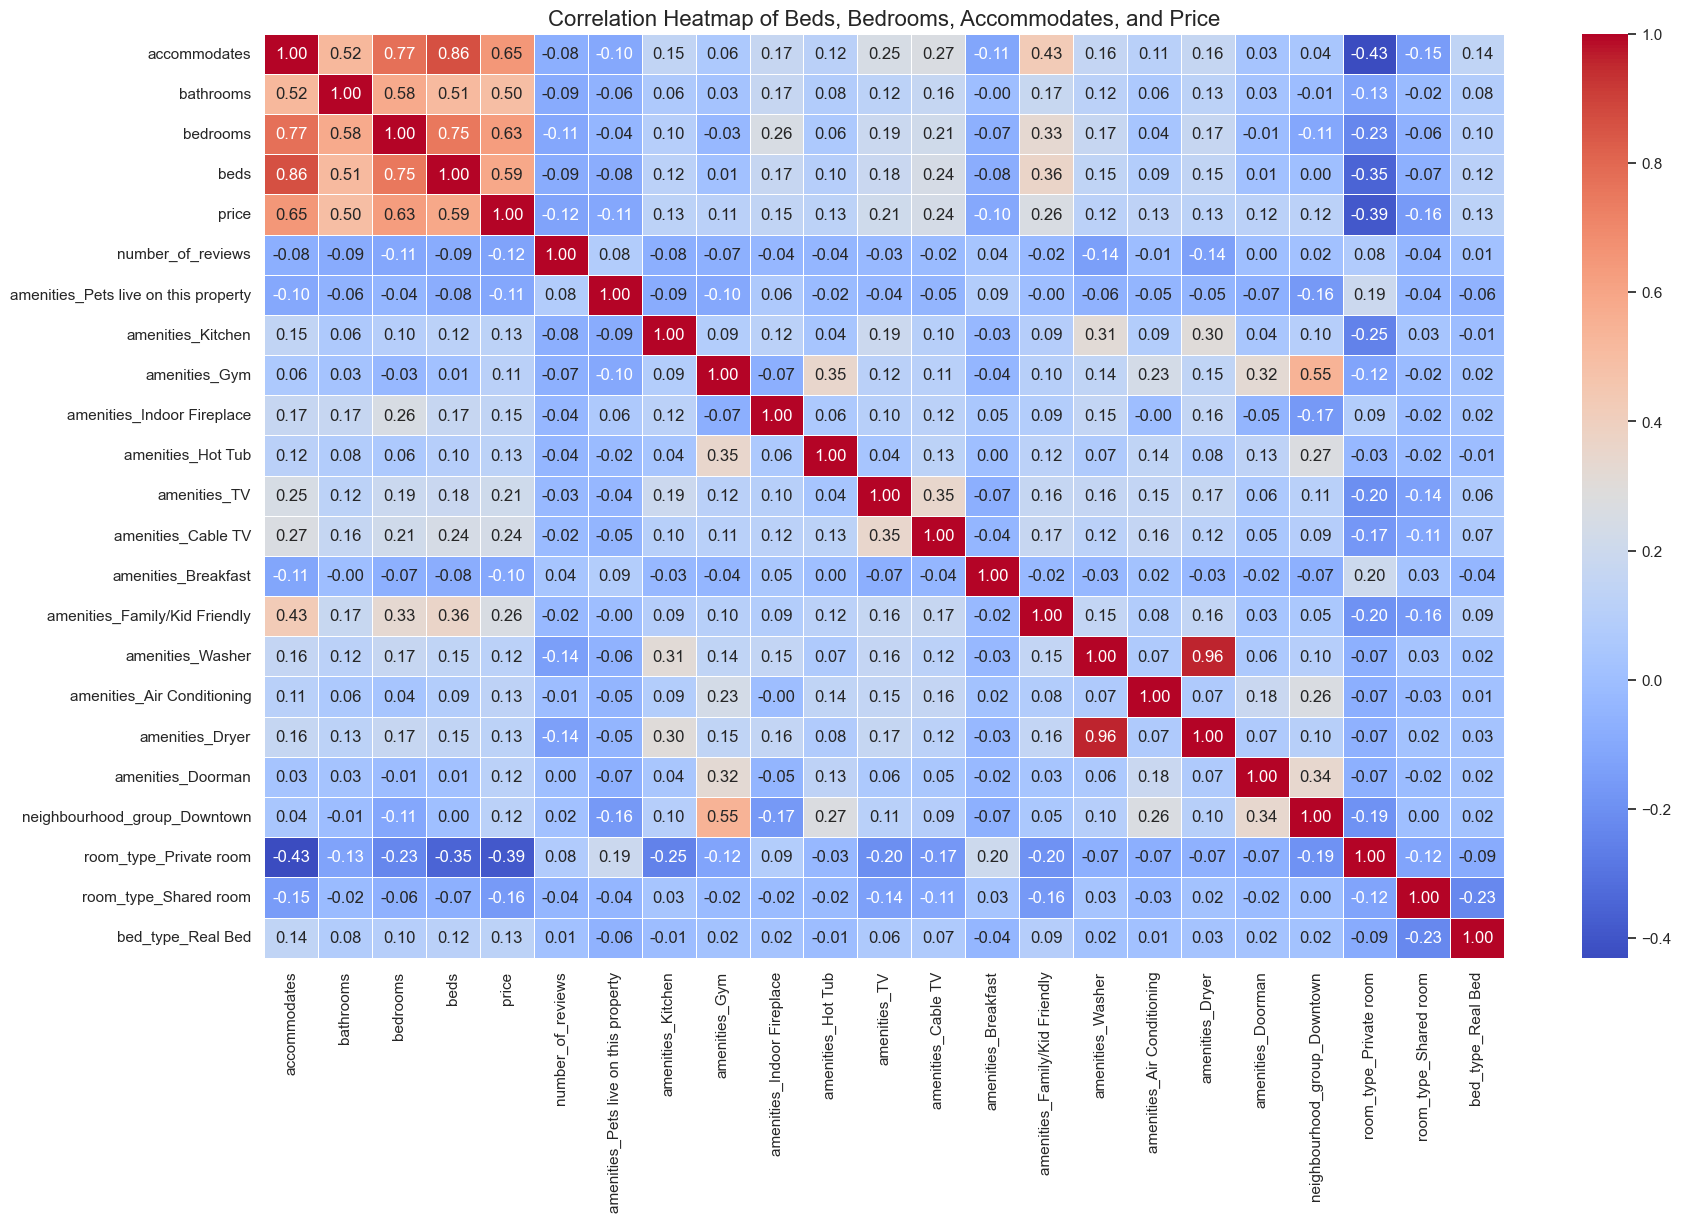

In [495]:
# Check correlations across all features with eachother
correlation_subset = ndfl[[
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'amenities_Pets live on this property',
    'amenities_Kitchen',
    'amenities_Gym',
    'amenities_Indoor Fireplace',
    'amenities_Hot Tub',
    'amenities_TV',
    'amenities_Cable TV',
    'amenities_Breakfast',
    'amenities_Family/Kid Friendly',
    'amenities_Washer',
    'amenities_Air Conditioning',
    'amenities_Dryer',
    'amenities_Doorman',
    'neighbourhood_group_Downtown',
    'room_type_Private room',
    'room_type_Shared room',
    'bed_type_Real Bed']].corr()

# Step 2: Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Title and labels
plt.title('Correlation Heatmap of Beds, Bedrooms, Accommodates, and Price', fontsize=16)
plt.savefig('Correlation_Heatmap.png', bbox_inches='tight')
plt.show()


In [463]:
# Switching boolean dtypes to int to be able to test them for varian inflation factors

columns = ['accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'number_of_reviews',
    'amenities_Pets live on this property',
    'amenities_Kitchen',
    'amenities_Gym',
    'amenities_Indoor Fireplace',
    'amenities_Hot Tub',
    'amenities_TV',
    'amenities_Cable TV',
    'amenities_Breakfast',
    'amenities_Family/Kid Friendly',
    'amenities_Washer',
    'amenities_Air Conditioning',
    'amenities_Dryer',
    'amenities_Doorman',
    'neighbourhood_group_Downtown',
    'room_type_Private room',
    'room_type_Shared room',
    'bed_type_Real Bed']

ndfl[['neighbourhood_group_Downtown','room_type_Private room','room_type_Shared room','bed_type_Real Bed']] = ndfl[['neighbourhood_group_Downtown',
    'room_type_Private room',
    'room_type_Shared room',
    'bed_type_Real Bed']].astype('int')

ndfl[columns].dtypes

accommodates                            int64
bathrooms                               int64
bedrooms                                int64
beds                                    int64
number_of_reviews                       int64
amenities_Pets live on this property    int64
amenities_Kitchen                       int64
amenities_Gym                           int64
amenities_Indoor Fireplace              int64
amenities_Hot Tub                       int64
amenities_TV                            int64
amenities_Cable TV                      int64
amenities_Breakfast                     int64
amenities_Family/Kid Friendly           int64
amenities_Washer                        int64
amenities_Air Conditioning              int64
amenities_Dryer                         int64
amenities_Doorman                       int64
neighbourhood_group_Downtown            int64
room_type_Private room                  int64
room_type_Shared room                   int64
bed_type_Real Bed                 

In [464]:
# Calculating VIF scores for the filtered features
vif_data = pd.DataFrame()
columns = ['accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'number_of_reviews',
    'amenities_Pets live on this property',
    'amenities_Kitchen',
    'amenities_Gym',
    'amenities_Indoor Fireplace',
    'amenities_Hot Tub',
    'amenities_TV',
    'amenities_Cable TV',
    'amenities_Breakfast',
    'amenities_Family/Kid Friendly',
    'amenities_Washer',
    'amenities_Air Conditioning',
    'amenities_Dryer',
    'amenities_Doorman',
    'neighbourhood_group_Downtown',
    'room_type_Private room',
    'room_type_Shared room',
    'bed_type_Real Bed']
vif_data["Feature"] = columns
vif_data["VIF"] = [variance_inflation_factor(ndfl[columns].values, i) for i in range(len(columns))]

# Display VIF values
print(vif_data.sort_values(by='VIF',ascending=False))

                                 Feature        VIF
16                       amenities_Dryer  56.027650
14                      amenities_Washer  55.855122
0                           accommodates  21.665890
3                                   beds  14.293248
21                     bed_type_Real Bed  11.932243
2                               bedrooms  10.223899
6                      amenities_Kitchen   9.708174
1                              bathrooms   9.122318
10                          amenities_TV   3.806258
13         amenities_Family/Kid Friendly   2.638600
11                    amenities_Cable TV   1.972487
19                room_type_Private room   1.970598
18          neighbourhood_group_Downtown   1.950737
7                          amenities_Gym   1.817496
8             amenities_Indoor Fireplace   1.511907
4                      number_of_reviews   1.395905
15            amenities_Air Conditioning   1.377917
5   amenities_Pets live on this property   1.374950
9           

In [465]:
# Wiritng and deploying a function to iterate through the features, dropping the highest VIF feature and repeating
# Until the remaining features all have VIF score lower than 10.

def remove_high_vif_features(df, features, threshold=10):
    """
    Remove features with VIF above the specified threshold iteratively.
    
    Parameters:
    - df: DataFrame containing the features
    - features: List of features to check
    - threshold: VIF threshold for removing features (default is 10)
    
    Returns:
    - Tuple containing:
        - List of remaining features with VIF below the threshold
        - DataFrame of remaining features and their corresponding VIF scores
    """
    while True:
        # Calculate VIF for each feature
        vif_data = pd.DataFrame()
        vif_data["Feature"] = features
        vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

        # Check the maximum VIF
        max_vif = vif_data["VIF"].max()
        
        # If the highest VIF is below the threshold, break the loop
        if max_vif < threshold:
            break
        
        # Identify the feature with the highest VIF
        feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        
        # Remove the feature with the highest VIF
        features.remove(feature_to_remove)
        print(f"Removed feature: {feature_to_remove} with VIF: {max_vif}")

    # Calculate final VIF for remaining features
    final_vif_data = pd.DataFrame()
    final_vif_data["Feature"] = features
    final_vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

    final_columns = features
    
    return final_columns, final_vif_data

remaining_features, remaining_vif_data = remove_high_vif_features(ndfl, columns)
print("Remaining features with VIF below threshold:", remaining_features)
print("VIF scores for remaining features:\n", remaining_vif_data)


Removed feature: amenities_Dryer with VIF: 56.0276499467181
Removed feature: accommodates with VIF: 21.661852358760612
Removed feature: bed_type_Real Bed with VIF: 11.72559666195336
Remaining features with VIF below threshold: ['bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'amenities_Pets live on this property', 'amenities_Kitchen', 'amenities_Gym', 'amenities_Indoor Fireplace', 'amenities_Hot Tub', 'amenities_TV', 'amenities_Cable TV', 'amenities_Breakfast', 'amenities_Family/Kid Friendly', 'amenities_Washer', 'amenities_Air Conditioning', 'amenities_Doorman', 'neighbourhood_group_Downtown', 'room_type_Private room', 'room_type_Shared room']
VIF scores for remaining features:
                                  Feature       VIF
0                              bathrooms  8.302684
1                               bedrooms  9.038317
2                                   beds  8.714171
3                      number_of_reviews  1.352694
4   amenities_Pets live on this property  1.365790

In [466]:
# Define features 
features = ndfl[remaining_features]
# Define labels as the 'price' column
labels = ndfl['price']


In [467]:
# Split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [468]:
# Normalize the data scales

scaler = StandardScaler()

# Fit and transform the training data, transform the test data
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


In [469]:
# Instantiate LR object to Run Multi-Linear Regression
model = LinearRegression()

In [470]:
# Fit the model
model.fit(features_train,labels_train)

LinearRegression()

In [471]:
# Use the model to predict the test set
labels_predict = model.predict(features_test)

In [472]:
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))

print('R^2 Score:', r2_score(labels_test, labels_predict))


Mean Squared Error: 3397.6518519242372
R^2 Score: 0.539572390298434


In [474]:
# Instantiate Lasso object to Run Multi-Linear Lasso Regression

lasso_model = Lasso(alpha=0.1)  # Change alpha to adjust regularization
lasso_model.fit(features_train, labels_train)

# Step 4: Make predictions
labels_predict = lasso_model.predict(features_test)

# Step 5: Evaluate the model
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))
print('R^2 Score:', r2_score(labels_test, labels_predict))

# Optional: Check the coefficients
print('Coefficients:', lasso_model.coef_)


Mean Squared Error: 3396.401290952006
R^2 Score: 0.5397418581616302
Coefficients: [ 16.90334689  31.90685614  12.36296229  -4.46975593  -0.14461007
  -1.05419803   0.73079617   3.63317308   2.82894934   0.38887328
   1.25736944  -0.87072491  -2.73746577  -1.83221511   1.86338485
   4.49847537   7.98150759 -20.93621446 -13.10586968]


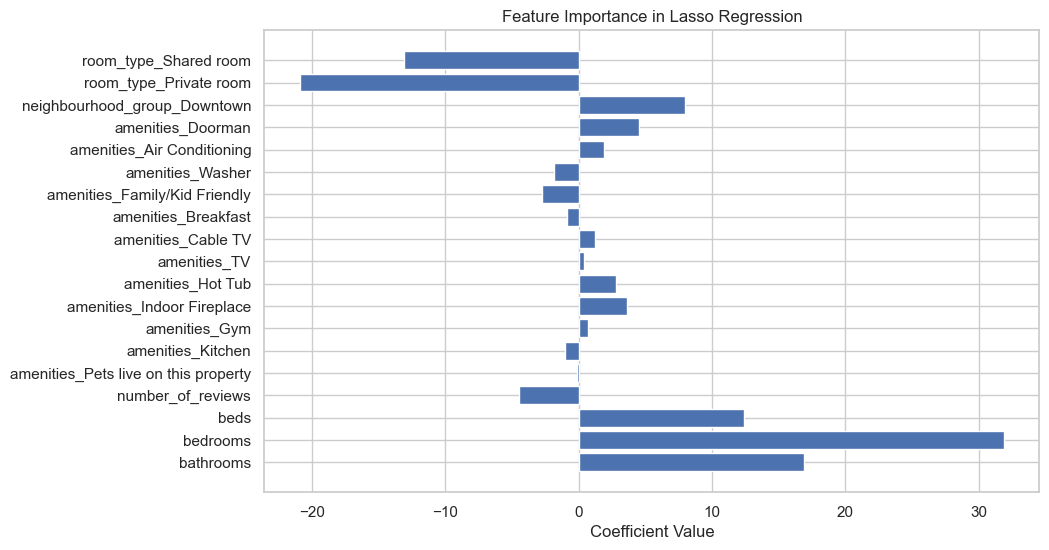

In [475]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(lasso_model.coef_)), lasso_model.coef_, align='center')
plt.yticks(np.arange(len(lasso_model.coef_)), features.columns)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.show()


In [476]:
# Performing Grid Search Cross-Validation on the lasso regression model with multiple alpha values


param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # You can adjust these values
}

# Initialize the Lasso model and GridSearchCV
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object
grid_search.fit(features_train, labels_train)

# Get the best model and parameters
best_lasso = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

# Make predictions with the best model
labels_predict = best_lasso.predict(features_test)

# Evaluate the best model
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))
print('R^2 Score:', r2_score(labels_test, labels_predict))

# Check the coefficients of the best model
coefficients = best_lasso.coef_
print('Coefficients:', coefficients)


Best parameters found:  {'alpha': 0.1}
Mean Squared Error: 3396.401290952006
R^2 Score: 0.5397418581616302
Coefficients: [ 16.90334689  31.90685614  12.36296229  -4.46975593  -0.14461007
  -1.05419803   0.73079617   3.63317308   2.82894934   0.38887328
   1.25736944  -0.87072491  -2.73746577  -1.83221511   1.86338485
   4.49847537   7.98150759 -20.93621446 -13.10586968]


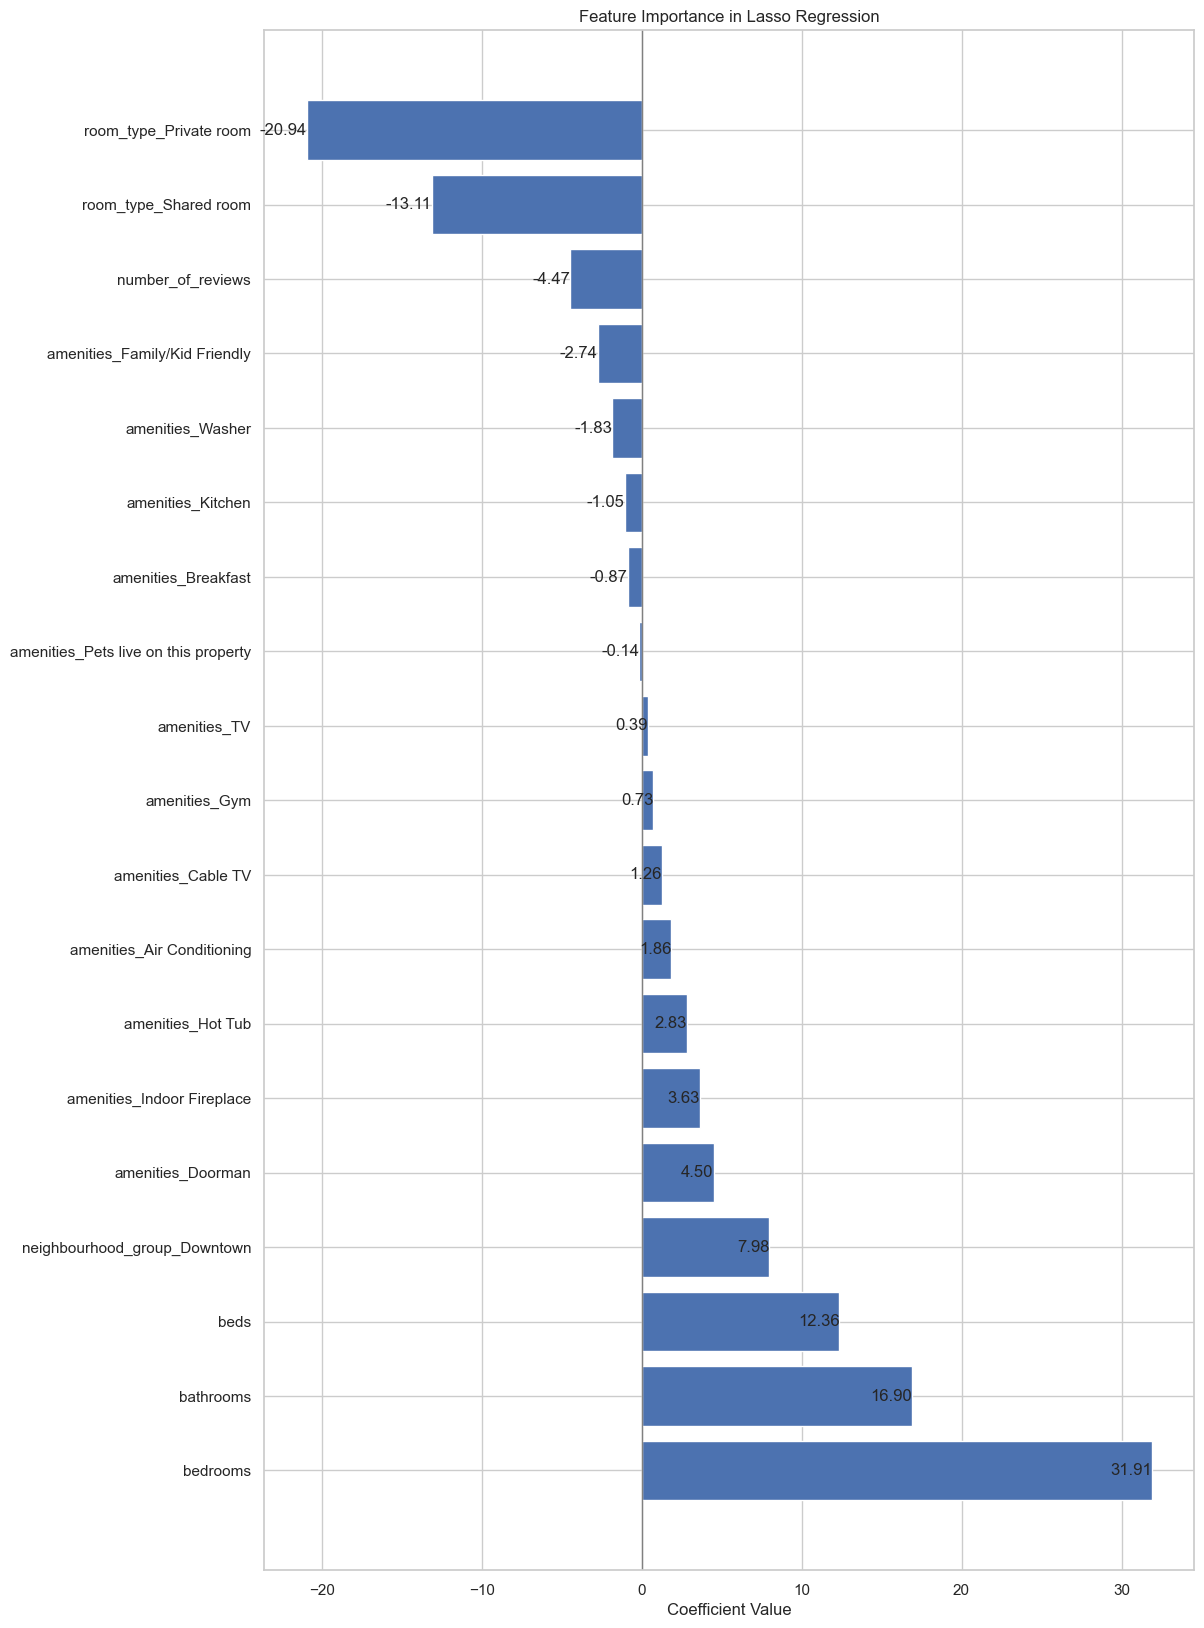

In [494]:
# Create a DataFrame for feature names and their coefficients
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 20))
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], align='center')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.axvline(0, color='grey', lw=1)  # Add a vertical line at 0 for reference

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', 
             ha='right', 
             fontsize=12)
plt.savefig('feature_importance_lasso_regression.png', bbox_inches='tight')
plt.show()


In [486]:
#OneHot encoded features are now disseminated across multiple columns, will reconsolidate them to perform a proper comparison.

# Create a DataFrame for feature names and their coefficients
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# Features that are already consolidated
individual_features = ['beds', 'bathrooms', 'bedrooms']

# Create a DataFrame for individual features
individual_coef_df = coef_df[coef_df['Feature'].isin(individual_features)]

# Consolidating the OneHot encoded features used in the model back into one column and calculating coefficient
one_hot_features = ['neighbourhood', 'neighbourhood_group', 'room_type', 'amenities'] 

# Initialize the dictionary to store consolidated coefficients
consolidated_coefficients = {}

for feature in one_hot_features:
    # Get the columns corresponding to the one-hot encoded feature
    encoded_columns = coef_df['Feature'].str.contains(feature)  
    # Sum the coefficients for those columns
    consolidated_coefficients[feature] = coef_df.loc[encoded_columns, 'Coefficient'].sum()

# Convert the consolidated coefficients to a DataFrame
consolidated_df = pd.DataFrame.from_dict(consolidated_coefficients, orient='index', columns=['Coefficient'])

# Combine the individual features and consolidated coefficients into a single DataFrame
final_coef_df = pd.concat([individual_coef_df.set_index('Feature'), consolidated_df.rename_axis('Feature')])



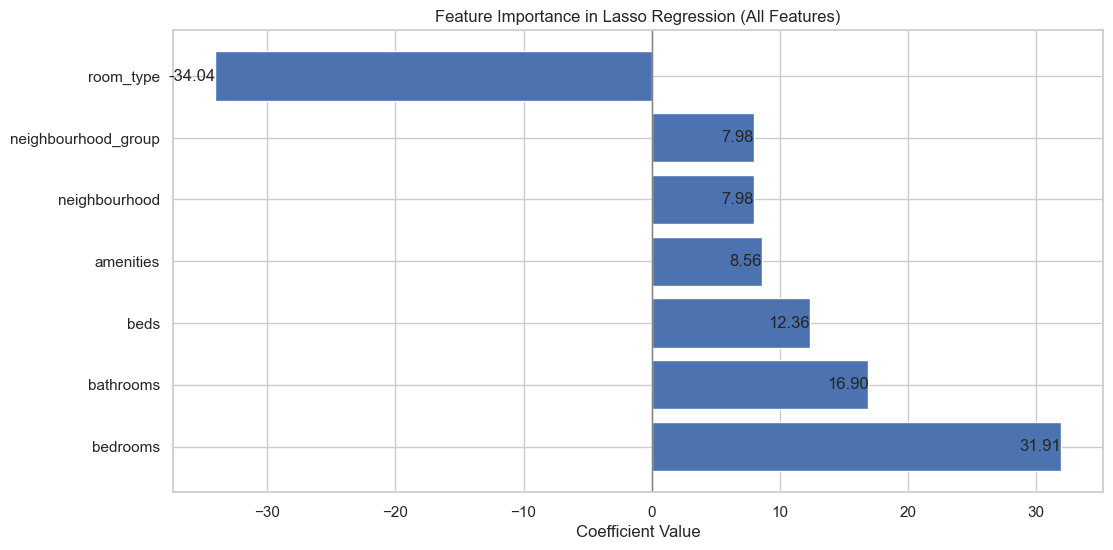

                     Coefficient
Feature                         
bedrooms               31.906856
bathrooms              16.903347
beds                   12.362962
amenities               8.561808
neighbourhood           7.981508
neighbourhood_group     7.981508
room_type             -34.042084


In [493]:
# Sort by Coefficient for better visualization
final_coef_df = final_coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the combined coefficients
plt.figure(figsize=(12, 6))
bars = plt.barh(final_coef_df.index, final_coef_df['Coefficient'], align='center')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression (All Features)')
plt.axvline(0, color='grey', lw=1)  # Add a vertical line at 0 for reference

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', 
             ha='right', 
             fontsize=12)
plt.savefig('feature_importance_lasso_regression-consolidated.png', bbox_inches='tight')
plt.show()

# Print the consolidated coefficients for analysis
print(final_coef_df)


**Key Insights**
1. We'll look at the regression coefficients as our key metric to answer the question.
2. Based on the best fit lasso model, the following are the regression coefficients of the top correlated factors in descending order.

    bedrooms               31.906856
    bathrooms              16.903347
    beds                   12.362962
    amenities               8.561808
    neighbourhood           7.981508
    neighbourhood_group     7.981508
    room_type             -34.042084


# Conclusion:


**1. What months witnessed the peak of the average listing nightly price in Seattle?**

1. The top 3 months in terms of mean nightly price are June, July and August at values ranging between 147 USD and 151 USD.
2. Looking at the median price, a similar trend is found.
3. This follows a seasonal trend where the high season in terms of pricing is in the months of summer.
4. It seems the aggregate trend is driven heavily by the seasonal trend taking place in listings Downtown based on both plots, while other neighbourhood groups display little to no spike in nightly rates.


**2. What are the top 3 listing neighbourhood groups in terms of average nightly price in Seattle?**

1. The top 3 listing neighbourhood groups in mean nightly price are Magnolia (178 USD), Queen Anne (157 USD) & Downtown (155 USD).
2. Looking at the median price figures, the top 3 neighbourhood groups are the same although in a different order.
3. It's important to consider the variation in count of listings per neighbourhood group (only 61 in Magnolia vs 520 Downtown and 294 in Queen Anne).


**3. What factors are most correlated with predicting the listing nightly price?**

Looking at the regression coefficients as our key metric to answer the question, based on the best fit lasso regression model, the following are the regression coefficients of the top correlated factors in descending order.

    * bedrooms 31.906856
    * bathrooms 16.903347
    * beds 12.362962
    * amenities 8.561808
    * neighbourhood & neighbourhood_group 7.981508
    * room_type -34.042084



In [502]:
# Saving all created df's to CSV
ndfl.to_csv('ndfl.csv', index=False)  
available.to_csv('available.csv', index=False)  
grouped.to_csv('grouped.csv', index=False)  
joined.to_csv('joined.csv', index=False)  
grouped_cal_ng.to_csv('grouped_cal_ng.csv', index=False)  
grouped_neighbourhoud_group.to_csv('grouped_neighbourhoud_group.csv', index=False)  
filtered_corr_df.to_csv('filtered_corr_df.csv', index=False)  
final_coef_df.to_csv('final_coef_df.csv', index=False)  
